In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [8]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [10]:
print(df.columns)

columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId']
existing_columns = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=existing_columns)

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


/tmp/ipython-input-10-3207666174.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-10-3207666174.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

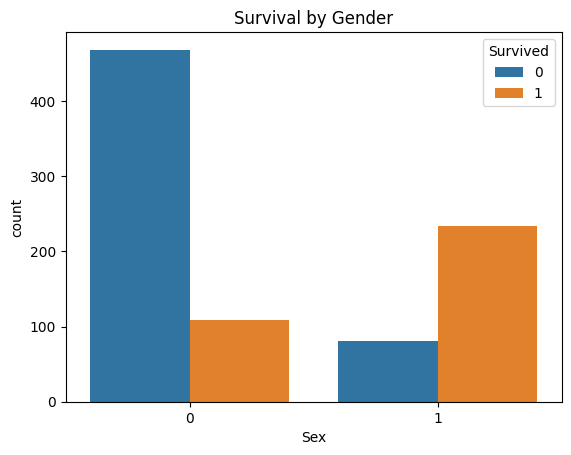

In [11]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

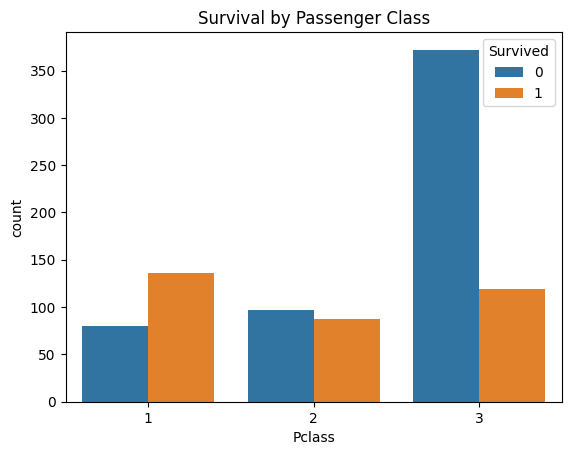

In [13]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

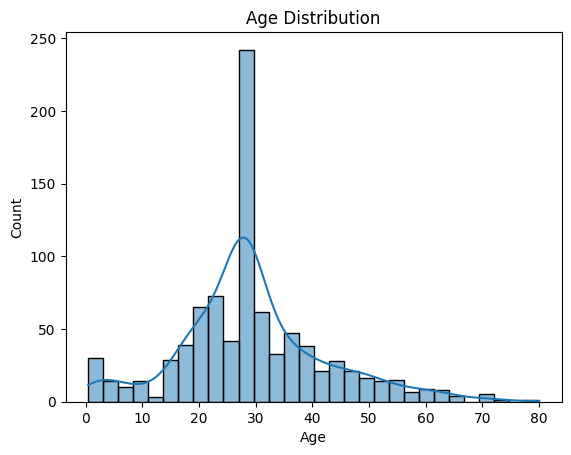

In [14]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

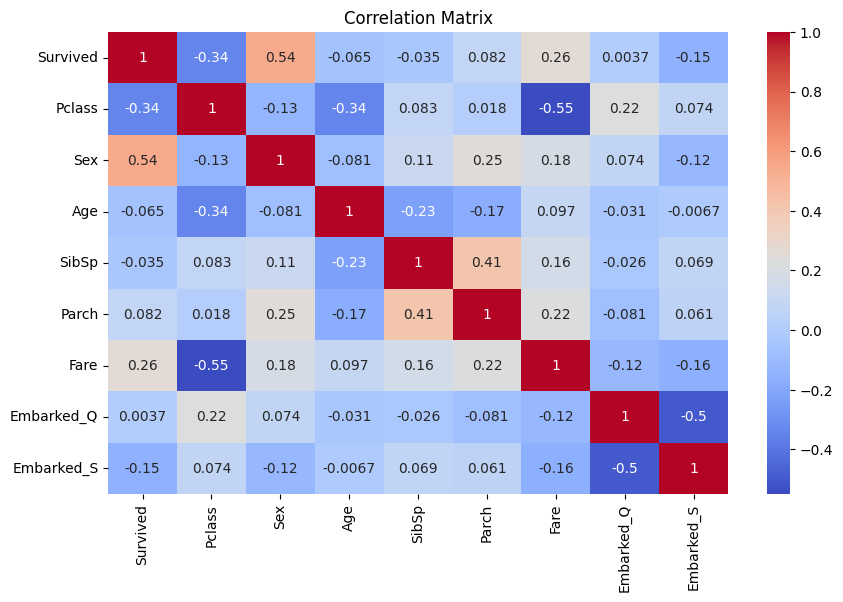

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
0,0.188908
1,0.742038


In [19]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 80], labels=['Child', 'Teen', 'Adult','Middle-Aged', 'Senior'])
df.groupby('AgeGroup')['Survived'].mean()

/tmp/ipython-input-21-2721764943.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean()


,Survived
AgeGroup,
Child,0.579710
Teen,0.428571
Adult,0.360465
Middle-Aged,0.390625
Senior,0.227273


In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.groupby('FamilySize')['Survived'].mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


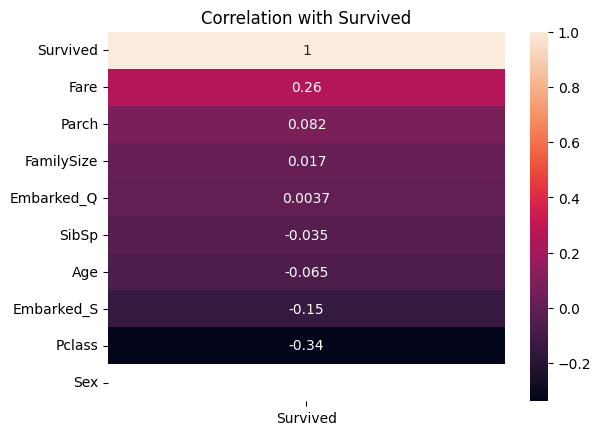

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = df.copy()
corr_df['Sex'] = corr_df['Sex'].map({'male':0, 'female':1})
corr_df = corr_df.drop(columns=['AgeGroup'])
corr = corr_df.corr()
sns.heatmap(corr[['Survived']].sort_values(by='Survived', ascending=False), annot=True)
plt.title("Correlation with Survived")
plt.show()